In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*(x**2) + x + 2 + np.random.normal(0, 1, 100)

## scikit-learn中的多项式回归

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# degree 表示对原有数据集最多添加几次幂的特征
poly = PolynomialFeatures(degree=2)
# 拟合
poly.fit(X)
# 将X的样本转换为多项式的特征
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
# 第一列是x的0次幂，第二列是x的1次幂，第三列是x的2次幂等于第二列的平方
X2[:5, :]

array([[ 1.        , -1.89157727,  3.57806456],
       [ 1.        , -1.68401525,  2.83590736],
       [ 1.        , -1.28495067,  1.65109823],
       [ 1.        ,  1.69993955,  2.88979449],
       [ 1.        , -2.84905377,  8.1171074 ]])

In [7]:
X[:5, :]

array([[-1.89157727],
       [-1.68401525],
       [-1.28495067],
       [ 1.69993955],
       [-2.84905377]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

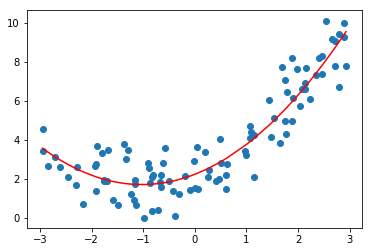

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='red')
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 1.0277307 , 0.50211859])

In [11]:
lin_reg2.intercept_

2.225327842930594

## 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

设样本的特征是x、y。这这6列分别对应 x^0y^0, x^1y^0, x^0, y^1, x^2y^0, xy, x^0y^2.即一个通用的特征项展开

### Pipeline 将数据沿着管道依次流过

In [15]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*(x**2) + x + 2 + np.random.normal(0, 1, 100)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [17]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

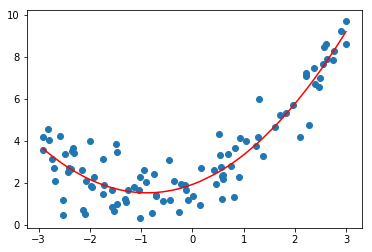

In [18]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')
plt.show()